# 線形回帰

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

市町村別の総人口、完全失業者数、刑法犯認知件数のデータを読み込み  
2005年調査実施データ  
政府統計e-Statより引用

In [2]:
data = pd.read_csv('../data/crime_data.csv')
data

,id,area,population,unemployee,crime
0,1101,北海道 札幌市 中央区,202801,6542,6118
1,1102,北海道 札幌市 北区,272877,9277,4615
2,1103,北海道 札幌市 東区,253996,9448,4114
3,1104,北海道 札幌市 白石区,201307,8606,4132
4,1105,北海道 札幌市 豊平区,209428,7464,3231
...,...,...,...,...,...
1833,47361,沖縄県 久米島町,9177,530,58
1834,47362,沖縄県 八重瀬町,25121,1145,245
1835,47375,沖縄県 多良間村,1370,32,11
1836,47381,沖縄県 竹富町,4192,72,55


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1838 non-null   int64 
 1   area        1838 non-null   object
 2   population  1838 non-null   int64 
 3   unemployee  1838 non-null   int64 
 4   crime       1838 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.9+ KB


## EDA

記述統計

In [4]:
data.describe()

,id,population,unemployee,crime
count,1838.000000,1838.000000,1838.000000,1838.000000
mean,21299.594668,68377.821001,2086.035365,1213.742111
std,14189.959120,102405.780050,3190.494082,2179.732544
min,1101.000000,438.000000,1.000000,0.000000
25%,8526.250000,10484.250000,273.250000,79.000000
50%,20542.000000,30922.000000,860.000000,313.000000
75%,32525.750000,80548.500000,2476.000000,1286.500000
max,47382.000000,841165.000000,29079.000000,22642.000000


可視化

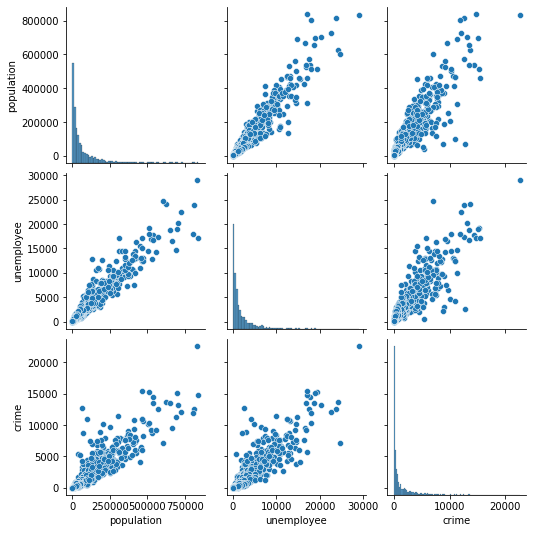

In [5]:
data2 = data.drop(['id', 'area'], axis=1)
sns.pairplot(data2)

## 最小二乗法

In [7]:
X = data['unemployee'].values
y = data['crime'].values

In [8]:
# 最小二乗法の関数を定義
def my_ols(X, y):
    Xtmp = X.reshape(-1,1)
    ytmp = y.reshape(-1,1)
    fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)
    
    beta = np.linalg.pinv(fmat.T.dot(fmat)).dot(fmat.T.dot(ytmp))
    
    return beta

In [9]:
# 回帰結果を可視化する関数を定義
def reg_plot(X, y, beta):
    beta0 = beta[0]
    beta1 = beta[1]
    xmax = max(X)
    
    plt.scatter(X, y, color='blue')
    plt.plot([0,xmax], [beta0, beta0+beta1*xmax], color='k')
    plt.show()

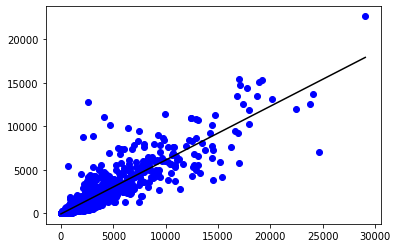

beta0:-76.69718362690855
beta1:0.6186085416194205


In [21]:
# 最小二乗法で線形回帰を実行
params = my_ols(X, y)

# 最小二乗法の回帰結果を可視化
reg_plot(X, y, params)
print('beta0:{}'.format(params[0][0]))
print('beta1:{}'.format(params[1][0]))

In [319]:
# 決定係数を計算
# 全変動
s_all = ((y-y.mean())**2).sum()
# 回帰変動
Xtmp = X.reshape(-1,1)
fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)
pred = fmat.dot(params)
s_reg = ((pred-pred.mean())**2).sum()

# 決定係数
r2 = s_reg/s_all
print('決定係数：{}'.format(r2))

決定係数：0.8198630140076191


## scikit-learnの実装と比べてみる

In [303]:
from sklearn.linear_model import LinearRegression

/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_48840/4112810596.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lr_params = np.array([lr.intercept_, lr.coef_])


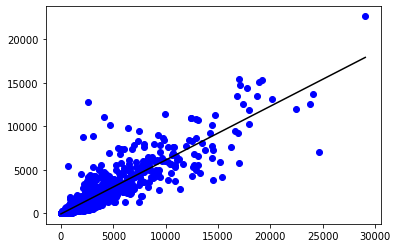

beta0:-76.697183625849
beta1:0.6186085416192684


In [304]:
# scikit-learnの線形回帰を実行
lr = LinearRegression().fit(X.reshape(-1,1), y.reshape(-1,1))

# scikit-learnの回帰結果を可視化
lr_params = np.array([lr.intercept_, lr.coef_])
reg_plot(X, y, lr_params)
print('beta0:{}'.format(lr_params[0][0]))
print('beta1:{}'.format(lr_params[1][0]))

In [320]:
# 決定係数の出力
r2 = lr.score(X.reshape(-1,1),y.reshape(-1,1))
print('決定係数：{}'.format(r2))

決定係数：0.8198630140072154


## 勾配降下法

In [285]:
# 犯罪件数のデータを読み込み
X = data['unemployee'].values
y = data['crime'].values

In [340]:
# 勾配降下法を実行

n = len(X)
eps = 1e-6
alpha = 0.01
beta = np.ones(2).reshape(-1,1)
iterations = 20000

X = (X-X.mean())/X.std()
y = (y-y.mean())/y.std()
Xtmp = X.reshape(-1,1)
ytmp = y.reshape(-1,1)
fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)

J_history = np.zeros(iterations)
beta_history = np.zeros((iterations,2))
grad = ((fmat.dot(beta)-ytmp).T.dot(fmat)).T / n

for i in range(iterations):
    beta = beta - alpha*grad
    grad = ((fmat.dot(beta)-ytmp).T.dot(fmat)).T / n
    
    J = (fmat.dot(beta)-ytmp).T.dot(fmat.dot(beta)-ytmp) / (2*n)
    J_history[i] = J
    beta_history[i,:] = beta.T

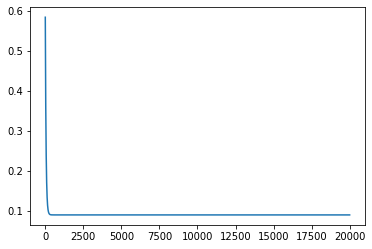

In [341]:
# 損失関数の変化を可視化
plt.plot(J_history)

/var/folders/v6/1f2j3j154zj9g03clj2_yt_00000gn/T/ipykernel_48840/2453534427.py:16: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xs, ys, zs.reshape(xmesh.shape), color='k', linestyles='dotted')


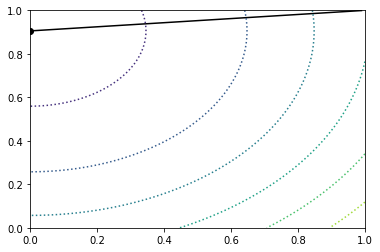

In [342]:
# 勾配降下法の探索過程を可視化
plt.scatter(beta[0], beta[1], color='k', marker='o')
plt.plot(beta_history[:,0], beta_history[:,1], color='k', linewidth=1.5)
xs = np.linspace(0, 1, 100)
ys = np.linspace(0, 1, 100)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.append(xmesh.reshape(-1,1), ymesh.reshape(-1,1), axis=1)

n = len(X)
zs = np.zeros(xx.shape[0])
for i in range(len(zs)):
    betatmp = xx[i,:].reshape(-1,1)
    buf = (fmat.dot(betatmp)-ytmp).T.dot(fmat.dot(betatmp)-ytmp) / (2*n)
    zs[i] = buf

plt.contour(xs, ys, zs.reshape(xmesh.shape), color='k', linestyles='dotted')
plt.show()

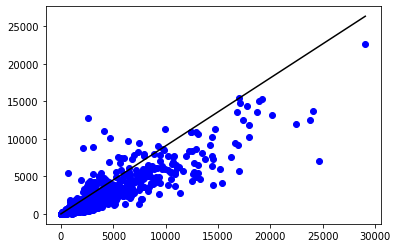

beta0:8.327405497933587e-17
beta1:0.9054628727933713


In [343]:
# 犯罪件数のデータをもう一度読み込む
X = data['unemployee'].values
y = data['crime'].values

# 勾配降下法の回帰結果を可視化
reg_plot(X, y, beta)
print('beta0:{}'.format(beta[0][0]))
print('beta1:{}'.format(beta[1][0]))

In [344]:
# 決定係数を計算
# 全変動
s_all = ((y-y.mean())**2).sum()
# 回帰変動
Xtmp = X.reshape(-1,1)
fmat = np.append(np.ones(Xtmp.shape), Xtmp, axis=1)
pred = fmat.dot(beta)
s_reg = ((pred-pred.mean())**2).sum()

# 決定係数
r2 = s_reg/s_all
print('決定係数：{}'.format(r2))

決定係数：1.7565105590980525


In [322]:
beta

array([[-2.78588662e-17],
       [ 9.05462873e-01]])